# NeuralEE on BRAIN-LARGE Dataset

`BRAIN-LARGE` Dataset consists of 1.3 million mouse brain cells, and it's clustered by `Louvain` algorithm.

In [1]:
import random
import torch
import numpy as np
import anndata
from neuralee.dataset import GeneExpressionDataset
from neuralee.embedding import NeuralEE
from neuralee._aux import scatter

%matplotlib inline

Choose a GPU. It could be defined as follow:
```
device = torch.device('cuda:0')
device = torch.device('cuda:1')
```

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

To reproduce the following results, fix the random seed.

In [3]:
torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

We preprocess `BRAIN-LARGE` data following the precdrues in (Zheng et al., 2017) and retain the top 50 principal components (PCs) as features.

In [4]:
adata = anndata.read_h5ad('../genomics_zheng17_50pcs.h5ad')
brain_dataset = GeneExpressionDataset(adata.X)

We apply NeuralEE with following hyper-paramters.
`N_small` takes as 5000.
`lam` takes as 1.
`perplexity` takes as 30.
`maxit` takes as 50.
`pin_memory` only can take as `False`.

Compute affinity, perplexity=30.0, N_small=5000, on each batch
NeuralEE: 100%|██████████| 50/50 [08:00<00:00,  9.61s/it]
Neural Elastic Embedding, lambda=1, completed in 482.67s.


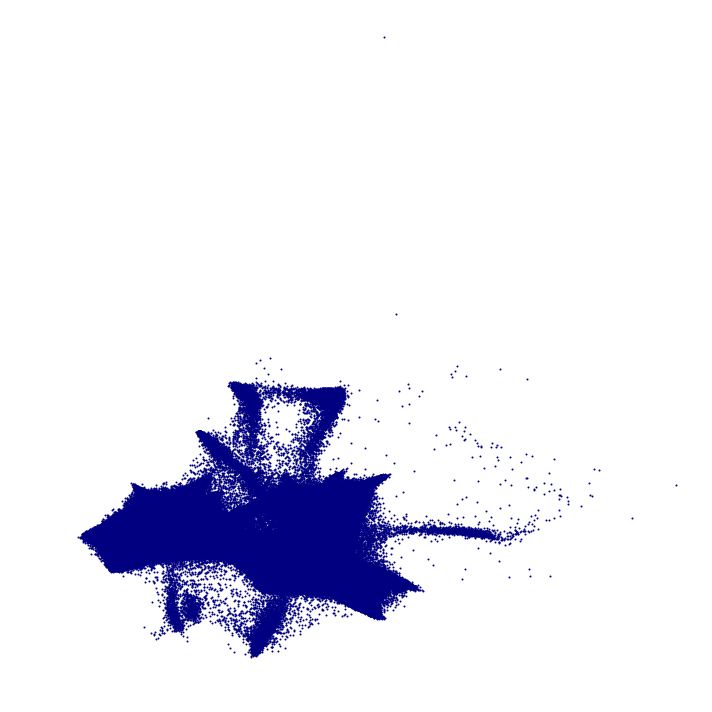

In [5]:
brain_dataset.affinity_split(N_small=5000, perplexity=30.0, verbose=True) 
NEE = NeuralEE(brain_dataset, lam=1, device=device)
results = NEE.fine_tune(maxit=50, verbose=True, pin_memory=False)
scatter(results['X'].numpy(), s=1, fg_kwargs={'figsize': [10, 10]})
np.save('embedding/BRAINLARGE_NEURALEE', results['X'].numpy())